Data Handling

In [2]:
import numpy as np
import pandas as pd

Open Crawled Data csv file

In [6]:
df = pd.read_csv("D:\study\VideoGamesPred\DataScience\game_data_final.csv", sep='\t')
#data = pd.read_csv("file1.csv", error_bad_lines=False)
df

,index,title,author,price,url,status,platform,rating,made_with,tags,accessibility,ASL
0,0,​Our Life: Beginnings & Always,GBPatch,NaN,https://gbpatch.itch.io/our-life,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Friday Night Funkin',ninjamuffin99,NaN,https://ninja-muffin24.itch.io/funkin,In development,"Windows, macOS, Linux, HTML5",4.7,"OpenFL, IndieCade, Haxe",2D,NaN,NaN
2,2,Adventures With Anxiety!,Nicky Case!,NaN,https://ncase.itch.io/anxiety,Released,HTML5,4.9,NaN,"Comedy, Mental Health, Narrative",NaN,NaN
3,3,Butterfly Soup,Brianna Lei,NaN,https://brianna-lei.itch.io/butterfly-soup,Released,"Windows, macOS, Linux",4.9,Ren'Py,"2D, Anime, Female Protagonist, LGBT, Ren'Py, R...",NaN,NaN
4,4,A Short Hike,adamgryu,$5.19,https://adamgryu.itch.io/a-short-hike,Released,"Windows, macOS, Linux",4.9,Unity,"3D, Atmospheric, Cute, Funny, nature, Relaxing...","Subtitles, Configurable controls",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5675,1949,Stay?,ejadelomax,NaN,https://ejadelomax.itch.io/stay,Released,HTML5,4.9,NaN,"Fantasy, LGBTQIA",NaN,NaN
5676,1950,Arc Symphony,Aether Interactive,$2.99,https://aetherinteractive.itch.io/arc-symphony,Released,"Windows, macOS, Linux",4.5,Twine,"Story Rich, Twine",NaN,NaN
5677,1951,Sounds of Her Love ~We'll always be together~,ds-sans,NaN,https://ds-sans.itch.io/soundsofherlove-wabt,Released,"Windows, macOS, Linux",4.4,Ren'Py,"Anime, Cute, drama, Romance",NaN,NaN
5678,1952,I'm Still Here,Cozy Game Pals,NaN,https://cozygamepals.itch.io/im-still-here,Released,"Windows, macOS, Linux",4.3,NaN,"3D, Atmospheric, Casual, Cute, Dark, Horror, R...",NaN,NaN


In [8]:
df1 = df
df1=df1.drop(['index'],axis=1)


Data preparation

In [9]:
df1 = df1.fillna(value={'price': 0.0})
replace_map = {'In development':1,'Released':2,'On hold':3,'Prototype':4,'Canceled':5}
df1.replace(replace_map, inplace=True)
df1=df1.drop_duplicates()
df1



,title,author,price,url,status,platform,rating,made_with,tags,accessibility,ASL
0,​Our Life: Beginnings & Always,GBPatch,0.0,https://gbpatch.itch.io/our-life,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Friday Night Funkin',ninjamuffin99,0.0,https://ninja-muffin24.itch.io/funkin,1.0,"Windows, macOS, Linux, HTML5",4.7,"OpenFL, IndieCade, Haxe",2D,NaN,NaN
2,Adventures With Anxiety!,Nicky Case!,0.0,https://ncase.itch.io/anxiety,2.0,HTML5,4.9,NaN,"Comedy, Mental Health, Narrative",NaN,NaN
3,Butterfly Soup,Brianna Lei,0.0,https://brianna-lei.itch.io/butterfly-soup,2.0,"Windows, macOS, Linux",4.9,Ren'Py,"2D, Anime, Female Protagonist, LGBT, Ren'Py, R...",NaN,NaN
4,A Short Hike,adamgryu,$5.19,https://adamgryu.itch.io/a-short-hike,2.0,"Windows, macOS, Linux",4.9,Unity,"3D, Atmospheric, Cute, Funny, nature, Relaxing...","Subtitles, Configurable controls",NaN
...,...,...,...,...,...,...,...,...,...,...,...
5672,Habitat,Tobias,0.0,https://tobiaslarson.itch.io/habitat,3.0,HTML5,4.3,Construct,"climate, Farming, Minimalist, nature, planet, ...",Interactive tutorial,NaN
5676,Arc Symphony,Aether Interactive,$2.99,https://aetherinteractive.itch.io/arc-symphony,2.0,"Windows, macOS, Linux",4.5,Twine,"Story Rich, Twine",NaN,NaN
5677,Sounds of Her Love ~We'll always be together~,ds-sans,0.0,https://ds-sans.itch.io/soundsofherlove-wabt,2.0,"Windows, macOS, Linux",4.4,Ren'Py,"Anime, Cute, drama, Romance",NaN,NaN
5678,I'm Still Here,Cozy Game Pals,0.0,https://cozygamepals.itch.io/im-still-here,2.0,"Windows, macOS, Linux",4.3,NaN,"3D, Atmospheric, Casual, Cute, Dark, Horror, R...",NaN,NaN


In [10]:
df1 = df1.dropna(subset=['platform', 'rating', 'tags', 'status'])
df1 = df1.reset_index()
df1 = df1.drop('index', axis=1)
df1

,title,author,price,url,status,platform,rating,made_with,tags,accessibility,ASL
0,Friday Night Funkin',ninjamuffin99,0.0,https://ninja-muffin24.itch.io/funkin,1.0,"Windows, macOS, Linux, HTML5",4.7,"OpenFL, IndieCade, Haxe",2D,NaN,NaN
1,Adventures With Anxiety!,Nicky Case!,0.0,https://ncase.itch.io/anxiety,2.0,HTML5,4.9,NaN,"Comedy, Mental Health, Narrative",NaN,NaN
2,Butterfly Soup,Brianna Lei,0.0,https://brianna-lei.itch.io/butterfly-soup,2.0,"Windows, macOS, Linux",4.9,Ren'Py,"2D, Anime, Female Protagonist, LGBT, Ren'Py, R...",NaN,NaN
3,A Short Hike,adamgryu,$5.19,https://adamgryu.itch.io/a-short-hike,2.0,"Windows, macOS, Linux",4.9,Unity,"3D, Atmospheric, Cute, Funny, nature, Relaxing...","Subtitles, Configurable controls",NaN
4,Project Kat,Leef 6010,0.0,https://leef6010.itch.io/projectkat,2.0,"Windows, macOS, Linux",4.8,"Paint Tool SAI, Godot, Aseprite","2D, Anime, Cute, Horror, Pixel Art, RPG Maker,...","Subtitles, Configurable controls, Interactive ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...
3785,Habitat,Tobias,0.0,https://tobiaslarson.itch.io/habitat,3.0,HTML5,4.3,Construct,"climate, Farming, Minimalist, nature, planet, ...",Interactive tutorial,NaN
3786,Arc Symphony,Aether Interactive,$2.99,https://aetherinteractive.itch.io/arc-symphony,2.0,"Windows, macOS, Linux",4.5,Twine,"Story Rich, Twine",NaN,NaN
3787,Sounds of Her Love ~We'll always be together~,ds-sans,0.0,https://ds-sans.itch.io/soundsofherlove-wabt,2.0,"Windows, macOS, Linux",4.4,Ren'Py,"Anime, Cute, drama, Romance",NaN,NaN
3788,I'm Still Here,Cozy Game Pals,0.0,https://cozygamepals.itch.io/im-still-here,2.0,"Windows, macOS, Linux",4.3,NaN,"3D, Atmospheric, Casual, Cute, Dark, Horror, R...",NaN,NaN


In [11]:
def column_to_bit_columns(column_name: str, base_df: pd.DataFrame):
    cols = base_df.columns.tolist()
    new_cols = list(set(', '.join(base_df[column_name].unique().tolist()).split(', ')))
    cols.remove(column_name)
    cols.extend(new_cols)
    new_df = pd.DataFrame(columns=cols, data=base_df)

    for i in range(len(base_df[column_name])):
        for col in base_df.loc[i, column_name].split(', '):
            new_df.loc[i, col] = 1.0

    return new_df.fillna(0.0), new_cols

In [12]:
df2, platforms = column_to_bit_columns('platform', df1)
df2, platforms

(                                              title              author  \
 0                              Friday Night Funkin'       ninjamuffin99   
 1                          Adventures With Anxiety!         Nicky Case!   
 2                                    Butterfly Soup         Brianna Lei   
 3                                      A Short Hike            adamgryu   
 4                                       Project Kat           Leef 6010   
 ...                                             ...                 ...   
 3785                                        Habitat              Tobias   
 3786                                   Arc Symphony  Aether Interactive   
 3787  Sounds of Her Love ~We'll always be together~             ds-sans   
 3788                                 I'm Still Here      Cozy Game Pals   
 3789                                   Cohabitation       AlgebraFalcon   
 
       price                                             url  status  rating  \
 0    

In [13]:
df2, tags = column_to_bit_columns('tags', df2)
df2

,title,author,price,url,status,rating,made_with,accessibility,ASL,HTML5,...,build-a-boyfriend,voice,outside-the-box,fnia,bbpsx,boss-rush,Blender,gacha-life-visual-novel,death-positive,Erotic
0,Friday Night Funkin',ninjamuffin99,0.0,https://ninja-muffin24.itch.io/funkin,1.0,4.7,"OpenFL, IndieCade, Haxe",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adventures With Anxiety!,Nicky Case!,0.0,https://ncase.itch.io/anxiety,2.0,4.9,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Butterfly Soup,Brianna Lei,0.0,https://brianna-lei.itch.io/butterfly-soup,2.0,4.9,Ren'Py,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Short Hike,adamgryu,$5.19,https://adamgryu.itch.io/a-short-hike,2.0,4.9,Unity,"Subtitles, Configurable controls",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Project Kat,Leef 6010,0.0,https://leef6010.itch.io/projectkat,2.0,4.8,"Paint Tool SAI, Godot, Aseprite","Subtitles, Configurable controls, Interactive ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,Habitat,Tobias,0.0,https://tobiaslarson.itch.io/habitat,3.0,4.3,Construct,Interactive tutorial,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3786,Arc Symphony,Aether Interactive,$2.99,https://aetherinteractive.itch.io/arc-symphony,2.0,4.5,Twine,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3787,Sounds of Her Love ~We'll always be together~,ds-sans,0.0,https://ds-sans.itch.io/soundsofherlove-wabt,2.0,4.4,Ren'Py,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3788,I'm Still Here,Cozy Game Pals,0.0,https://cozygamepals.itch.io/im-still-here,2.0,4.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df2 = df2.loc[:, ~df2.columns.duplicated()].copy()
df2

,title,author,price,url,status,rating,made_with,accessibility,ASL,HTML5,...,build-a-boyfriend,voice,outside-the-box,fnia,bbpsx,boss-rush,Blender,gacha-life-visual-novel,death-positive,Erotic
0,Friday Night Funkin',ninjamuffin99,0.0,https://ninja-muffin24.itch.io/funkin,1.0,4.7,"OpenFL, IndieCade, Haxe",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adventures With Anxiety!,Nicky Case!,0.0,https://ncase.itch.io/anxiety,2.0,4.9,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Butterfly Soup,Brianna Lei,0.0,https://brianna-lei.itch.io/butterfly-soup,2.0,4.9,Ren'Py,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Short Hike,adamgryu,$5.19,https://adamgryu.itch.io/a-short-hike,2.0,4.9,Unity,"Subtitles, Configurable controls",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Project Kat,Leef 6010,0.0,https://leef6010.itch.io/projectkat,2.0,4.8,"Paint Tool SAI, Godot, Aseprite","Subtitles, Configurable controls, Interactive ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,Habitat,Tobias,0.0,https://tobiaslarson.itch.io/habitat,3.0,4.3,Construct,Interactive tutorial,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3786,Arc Symphony,Aether Interactive,$2.99,https://aetherinteractive.itch.io/arc-symphony,2.0,4.5,Twine,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3787,Sounds of Her Love ~We'll always be together~,ds-sans,0.0,https://ds-sans.itch.io/soundsofherlove-wabt,2.0,4.4,Ren'Py,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3788,I'm Still Here,Cozy Game Pals,0.0,https://cozygamepals.itch.io/im-still-here,2.0,4.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:

df_freq = pd.DataFrame(columns=['freq'])
to_drop = []
for idx, tag in zip(range(len(tags)), tags):
    freq = sum(df2[tag])
    if freq > 1.0:
        df_freq.loc[tag] = freq
    else:
        to_drop.append(tag)

df_freq

,freq
Futuristic,13.0
programming,4.0
emotional,4.0
grindhouse,2.0
Mystery,245.0
...,...
4d,2.0
depression,7.0
fnia,2.0
Blender,4.0


In [16]:
df2

,title,author,price,url,status,rating,made_with,accessibility,ASL,HTML5,...,build-a-boyfriend,voice,outside-the-box,fnia,bbpsx,boss-rush,Blender,gacha-life-visual-novel,death-positive,Erotic
0,Friday Night Funkin',ninjamuffin99,0.0,https://ninja-muffin24.itch.io/funkin,1.0,4.7,"OpenFL, IndieCade, Haxe",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adventures With Anxiety!,Nicky Case!,0.0,https://ncase.itch.io/anxiety,2.0,4.9,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Butterfly Soup,Brianna Lei,0.0,https://brianna-lei.itch.io/butterfly-soup,2.0,4.9,Ren'Py,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Short Hike,adamgryu,$5.19,https://adamgryu.itch.io/a-short-hike,2.0,4.9,Unity,"Subtitles, Configurable controls",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Project Kat,Leef 6010,0.0,https://leef6010.itch.io/projectkat,2.0,4.8,"Paint Tool SAI, Godot, Aseprite","Subtitles, Configurable controls, Interactive ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,Habitat,Tobias,0.0,https://tobiaslarson.itch.io/habitat,3.0,4.3,Construct,Interactive tutorial,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3786,Arc Symphony,Aether Interactive,$2.99,https://aetherinteractive.itch.io/arc-symphony,2.0,4.5,Twine,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3787,Sounds of Her Love ~We'll always be together~,ds-sans,0.0,https://ds-sans.itch.io/soundsofherlove-wabt,2.0,4.4,Ren'Py,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3788,I'm Still Here,Cozy Game Pals,0.0,https://cozygamepals.itch.io/im-still-here,2.0,4.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
for col in to_drop:
    df2 = df2.drop(col, axis=1)
df2

,title,author,price,url,status,rating,made_with,accessibility,ASL,HTML5,...,kids,upgrades,oelvn,lunime,Cute,4d,depression,fnia,Blender,death-positive
0,Friday Night Funkin',ninjamuffin99,0.0,https://ninja-muffin24.itch.io/funkin,1.0,4.7,"OpenFL, IndieCade, Haxe",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adventures With Anxiety!,Nicky Case!,0.0,https://ncase.itch.io/anxiety,2.0,4.9,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Butterfly Soup,Brianna Lei,0.0,https://brianna-lei.itch.io/butterfly-soup,2.0,4.9,Ren'Py,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Short Hike,adamgryu,$5.19,https://adamgryu.itch.io/a-short-hike,2.0,4.9,Unity,"Subtitles, Configurable controls",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Project Kat,Leef 6010,0.0,https://leef6010.itch.io/projectkat,2.0,4.8,"Paint Tool SAI, Godot, Aseprite","Subtitles, Configurable controls, Interactive ...",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,Habitat,Tobias,0.0,https://tobiaslarson.itch.io/habitat,3.0,4.3,Construct,Interactive tutorial,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3786,Arc Symphony,Aether Interactive,$2.99,https://aetherinteractive.itch.io/arc-symphony,2.0,4.5,Twine,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3787,Sounds of Her Love ~We'll always be together~,ds-sans,0.0,https://ds-sans.itch.io/soundsofherlove-wabt,2.0,4.4,Ren'Py,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3788,I'm Still Here,Cozy Game Pals,0.0,https://cozygamepals.itch.io/im-still-here,2.0,4.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df2=df2.drop(['url','author','made_with','ASL'],axis=1)
df2['price'] = df2['price'].str.replace('$','')
df2.accessibility[df2.accessibility != 0] = 1
df2

C:\Users\George\AppData\Local\Temp\ipykernel_20700\192196046.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['price'] = df2['price'].str.replace('$','')
C:\Users\George\AppData\Local\Temp\ipykernel_20700\192196046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.accessibility[df2.accessibility != 0] = 1


,title,price,status,rating,accessibility,HTML5,macOS,Windows,Flash,Linux,...,kids,upgrades,oelvn,lunime,Cute,4d,depression,fnia,Blender,death-positive
0,Friday Night Funkin',NaN,1.0,4.7,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adventures With Anxiety!,NaN,2.0,4.9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Butterfly Soup,NaN,2.0,4.9,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Short Hike,5.19,2.0,4.9,1,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Project Kat,NaN,2.0,4.8,1,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,Habitat,NaN,3.0,4.3,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3786,Arc Symphony,2.99,2.0,4.5,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3787,Sounds of Her Love ~We'll always be together~,NaN,2.0,4.4,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3788,I'm Still Here,NaN,2.0,4.3,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

df2.to_csv('results_final.tsv', sep='\t')

In [21]:
most_shown_tags=df_freq
most_shown_tags=most_shown_tags[most_shown_tags['freq']>8]
most_shown_tags

,freq
Futuristic,13.0
Mystery,245.0
Crime,25.0
Multiplayer,148.0
satire,15.0
...,...
gb-studio,15.0
Flight,15.0
Robots,35.0
upgrades,15.0


In [ ]:
df_freq.describe()

In [22]:
least_shown_tags=df_freq
least_shown_tags=least_shown_tags[least_shown_tags['freq']<8]
least_shown_tags.describe()

,freq
count,629.000000
mean,3.122417
std,1.442957
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,7.000000


In [23]:
columns_to_drop= least_shown_tags.index.tolist()
columns_to_drop

['programming',
 'emotional',
 'grindhouse',
 'love',
 'Souls-like',
 'Doom',
 'character-creator',
 'rc',
 'playstation',
 'cat',
 'caves',
 'giant-level',
 'conversation',
 'spells',
 'beach',
 'Golf',
 'community',
 'pony',
 'logic-puzzle',
 'short-story',
 'fashion',
 'gallery',
 'zine',
 'diving',
 'polyamory',
 'desktop',
 'Art Book',
 'non-binary',
 'combat',
 'jumpscare',
 'Folklore',
 'dating-sims',
 'goose',
 'hps1',
 'flightsim',
 'snail',
 'mining',
 'ocean',
 'haunted',
 'wall-jumping',
 'MMORPG',
 'Soundtoy',
 '1GAM',
 'killer',
 'horror-games',
 'sword',
 'PROCJAM',
 'One-shot',
 'warioware',
 'Family Friendly',
 'shrek',
 'tragedy',
 'match-3',
 'stg',
 'investigation',
 'hidden-object',
 'cinematic',
 'love-story',
 'NES ROM',
 'game-boy',
 'belly',
 'Instrument',
 'browser',
 'moe',
 'hardcore',
 'prologue',
 'nonbinary-protagonist',
 'sea',
 'haiku',
 'lizard',
 'Split Screen',
 'holiday',
 'wrestling',
 'storygame',
 'storytelling',
 'backrooms',
 'horror-rpg',
 'me

In [ ]:
df2.drop(columns_to_drop,axis=1,inplace=True)

In [25]:
df2 = df2.fillna(value={'price': 0.0})
df2

,title,price,status,rating,accessibility,HTML5,macOS,Windows,Flash,Linux,...,Generator,Frogs,Nonlinear,Christmas,gb-studio,Flight,meta,Robots,upgrades,Cute
0,Friday Night Funkin',0.0,1.0,4.7,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adventures With Anxiety!,0.0,2.0,4.9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Butterfly Soup,0.0,2.0,4.9,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Short Hike,5.19,2.0,4.9,1,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Project Kat,0.0,2.0,4.8,1,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,Habitat,0.0,3.0,4.3,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3786,Arc Symphony,2.99,2.0,4.5,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3787,Sounds of Her Love ~We'll always be together~,0.0,2.0,4.4,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3788,I'm Still Here,0.0,2.0,4.3,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")


In [27]:
df2.price.replace('R', '', regex=True, inplace=True)
df2.price.replace('£', '', regex=True, inplace=True)
df2.price.replace('P', '', regex=True, inplace=True)
df2.price.replace('€', '', regex=True, inplace=True)
df2

,title,price,status,rating,accessibility,HTML5,macOS,Windows,Flash,Linux,...,Generator,Frogs,Nonlinear,Christmas,gb-studio,Flight,meta,Robots,upgrades,Cute
0,Friday Night Funkin',0.0,1.0,4.7,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adventures With Anxiety!,0.0,2.0,4.9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Butterfly Soup,0.0,2.0,4.9,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Short Hike,5.19,2.0,4.9,1,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Project Kat,0.0,2.0,4.8,1,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,Habitat,0.0,3.0,4.3,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3786,Arc Symphony,2.99,2.0,4.5,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3787,Sounds of Her Love ~We'll always be together~,0.0,2.0,4.4,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3788,I'm Still Here,0.0,2.0,4.3,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Data Visualization

Let`s see how price affects the game ratings

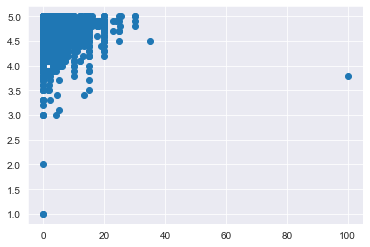

In [28]:
plt.plot(df2.price,df2.rating, 'o')

Dependence on status (on hold, in development, released, prototype, canceled)

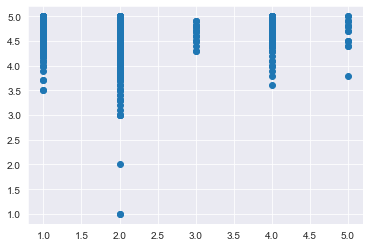

In [29]:
plt.scatter(df2.status, df2.rating)

Percenge of games supported by each platform

<AxesSubplot:ylabel='Windows'>

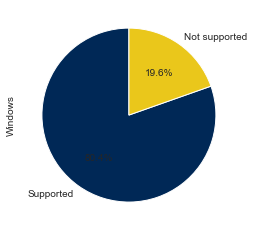

In [30]:
mycolors = ['#002856', '#EAC71B']
labels= ['Supported', 'Not supported']
df2['Windows'].value_counts().plot(kind='pie',colors=mycolors,labels=labels, autopct='%1.1f%%', startangle=90)
#df2.plot.bar(x='rating'y=['Windows','Linux','macOS','Android','HTML5','Flash','Unity'])

<AxesSubplot:ylabel='Linux'>

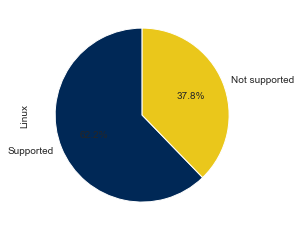

In [31]:
df2['Linux'].value_counts().plot(kind='pie',colors=mycolors,labels=labels, autopct='%1.1f%%', startangle=90)

<AxesSubplot:ylabel='macOS'>

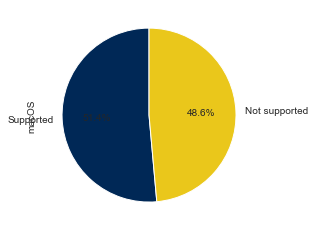

In [32]:
df2['macOS'].value_counts().plot(kind='pie',colors=mycolors,labels=labels, autopct='%1.1f%%', startangle=90)

<AxesSubplot:ylabel='Android'>

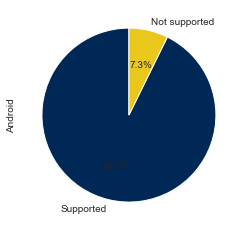

In [33]:
df2['Android'].value_counts().plot(kind='pie',colors=mycolors,labels=labels, autopct='%1.1f%%', startangle=90)

Browser games

<AxesSubplot:ylabel='HTML5'>

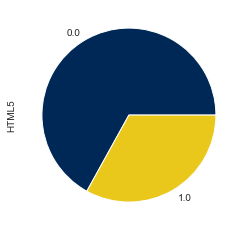

In [34]:

df2['HTML5'].value_counts().plot(kind='pie',colors=mycolors)

Let`s see percentage of games on each platform

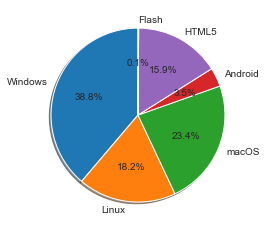

In [35]:
y=np.array([sum(df2['Windows']),sum(df2['Linux']),sum(df2['macOS']),sum(df2['Android']),sum(df2['HTML5']),sum(df2['Flash'])])
labels=['Windows','Linux','macOS','Android','HTML5','Flash']
plt.pie(y,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)

plt.show()


Now let`s see most popular genres

In [36]:
most_shown_tags.sort_values(by=['freq'],ascending=False,inplace=True)
most_shown_tags

,freq
2D,1048.0
Singleplayer,928.0
Pixel Art,923.0
Horror,757.0
Short,607.0
...,...
Episodic,9.0
Dice,9.0
Gender,9.0
Ludum Dare 38,9.0


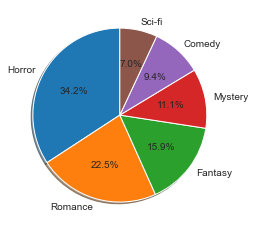

In [37]:
y=np.array([sum(df2['Horror']),sum(df2['Romance']),sum(df2['Fantasy']),sum(df2['Mystery']),sum(df2['Comedy']),sum(df2['Sci-fi'])])
labels=['Horror','Romance','Fantasy','Mystery','Comedy','Sci-fi']
plt.pie(y,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)

plt.show()

You can use the package sklearn and its associated preprocessing utilities to normalize the data.

In [109]:
df_freq.describe()

,freq
count,1509.000000
mean,24.603048
std,100.256598
min,2.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,1544.000000


In [55]:
least_shown_tags=df_freq
least_shown_tags=least_shown_tags[least_shown_tags['freq']<8]
least_shown_tags.describe()

,freq
count,1127.000000
mean,2.871340
std,1.338839
min,2.000000
25%,2.000000
50%,2.000000
75%,3.500000
max,7.000000


In [28]:
columns_to_drop= least_shown_tags.index.tolist()
columns_to_drop

,freq
machine-learning,2.0
rhythm-doctor,2.0
daniel-mullins,2.0
ai,2.0
jasperdev,2.0
residence-gudul,2.0
contemp,2.0
collecting,2.0
highschool,2.0
grimdark,2.0


In [56]:
df2.drop(columns_to_drop,axis=1,inplace=True)
df2

,title,price,status,rating,accessibility,HTML5,Flash,Unity,macOS,Linux,...,Demake,Creepy,secrets,Historical,Female Protagonist,Skeletons,Yaoi,Game Jam,Dark Fantasy,Sandbox
0,Logica Emotica,2.99,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sanevol Incident 44,2.99,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Axis Mundi,2.50,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The True Ingredients,4.01,2.0,3.0,1,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Camp Palut: A Queer Mystery,13.99,2.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,Stay?,NaN,2.0,4.9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493,Arc Symphony,2.99,2.0,4.5,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5494,Sounds of Her Love ~We'll always be together~,NaN,2.0,4.4,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5495,I'm Still Here,NaN,2.0,4.3,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:

from matplotlib import pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")


In [73]:
df2.price.replace('R', '', regex=True, inplace=True)
df2.price.replace('£', '', regex=True, inplace=True)
df2.price.replace('P', '', regex=True, inplace=True)
df2.price.replace('€', '', regex=True, inplace=True)
df2

,title,price,status,rating,accessibility,HTML5,Flash,Unity,macOS,Linux,...,Demake,Creepy,secrets,Historical,Female Protagonist,Skeletons,Yaoi,Game Jam,Dark Fantasy,Sandbox
0,Logica Emotica,2.99,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sanevol Incident 44,2.99,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Axis Mundi,2.50,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The True Ingredients,4.01,2.0,3.0,1,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Camp Palut: A Queer Mystery,13.99,2.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,Stay?,NaN,2.0,4.9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493,Arc Symphony,2.99,2.0,4.5,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5494,Sounds of Her Love ~We'll always be together~,NaN,2.0,4.4,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5495,I'm Still Here,NaN,2.0,4.3,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data Visualization

Let`s see how price affects the game ratings

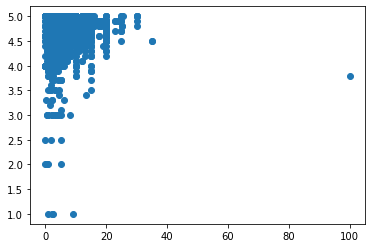

In [93]:
plt.plot(df2.price,df2.rating, 'o')

Dependence on status (on hold, in development, released, prototype, canceled)

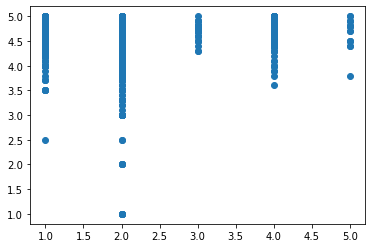

In [84]:
plt.scatter(df2.status, df2.rating)

Percenge of games supported by each platform

<AxesSubplot:ylabel='Windows'>

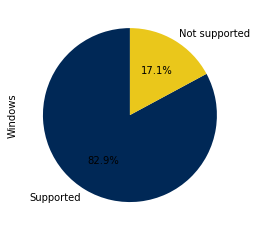

In [143]:
mycolors = ['#002856', '#EAC71B']
labels= ['Supported', 'Not supported']
df2['Windows'].value_counts().plot(kind='pie',colors=mycolors,labels=labels, autopct='%1.1f%%', startangle=90)
#df2.plot.bar(x='rating'y=['Windows','Linux','macOS','Android','HTML5','Flash','Unity'])

<AxesSubplot:ylabel='Linux'>

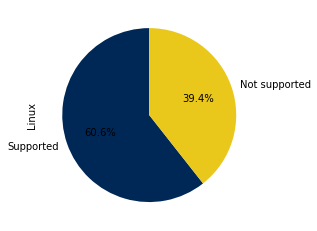

In [144]:
df2['Linux'].value_counts().plot(kind='pie',colors=mycolors,labels=labels, autopct='%1.1f%%', startangle=90)

<AxesSubplot:ylabel='macOS'>

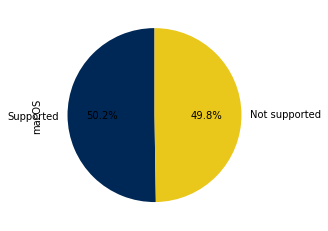

In [145]:
df2['macOS'].value_counts().plot(kind='pie',colors=mycolors,labels=labels, autopct='%1.1f%%', startangle=90)

<AxesSubplot:ylabel='Android'>

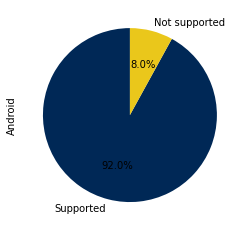

In [146]:
df2['Android'].value_counts().plot(kind='pie',colors=mycolors,labels=labels, autopct='%1.1f%%', startangle=90)

Browser games

<AxesSubplot:ylabel='HTML5'>

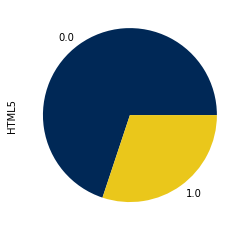

In [127]:

df2['HTML5'].value_counts().plot(kind='pie',colors=mycolors)

Let`s see percentage of games on each platform

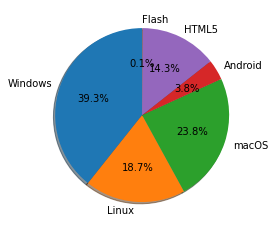

In [108]:
y=np.array([sum(df2['Windows']),sum(df2['Linux']),sum(df2['macOS']),sum(df2['Android']),sum(df2['HTML5']),sum(df2['Flash'])])
labels=['Windows','Linux','macOS','Android','HTML5','Flash']
plt.pie(y,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)

plt.show()


Now let`s see most popular genres

In [121]:
most_shown_tags.sort_values(by=['freq'],ascending=False,inplace=True)
most_shown_tags

,freq
2D,1544.0
Singleplayer,1394.0
Pixel Art,1348.0
Horror,1105.0
Short,862.0
...,...
poem,9.0
Traps,9.0
death,9.0
one-hit-kill,9.0


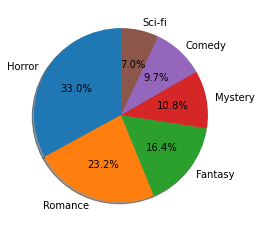

In [122]:
y=np.array([sum(df2['Horror']),sum(df2['Romance']),sum(df2['Fantasy']),sum(df2['Mystery']),sum(df2['Comedy']),sum(df2['Sci-fi'])])
labels=['Horror','Romance','Fantasy','Mystery','Comedy','Sci-fi']
plt.pie(y,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)

plt.show()

Maschine learning

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
df_copy= df2.copy()
df_copy.drop(['title'],axis=1,inplace=True)
df_copy

In [60]:
df_for_corr=df2.drop(['rating'],axis=1)
corr_df = df_for_corr.corr(method="spearman")
corr_df


,status,HTML5,macOS,Windows,Flash,Linux,Unity,Android,Futuristic,Mystery,...,Generator,Frogs,Nonlinear,Christmas,gb-studio,Flight,meta,Robots,upgrades,Cute
status,1.000000,0.086828,-0.056063,-0.059124,0.036461,-0.059959,-0.030622,-0.043889,-0.021667,-0.049597,...,0.000802,-0.011082,0.006927,0.010208,0.011788,-0.026629,0.015357,-0.006042,0.000712,0.044946
HTML5,0.086828,1.000000,-0.353746,-0.681879,-0.036125,-0.271618,-0.025088,-0.047873,-0.012420,-0.088824,...,0.041036,0.014652,-0.009627,0.042332,0.089749,-0.017469,-0.007856,-0.032620,0.027205,0.058879
macOS,-0.056063,-0.353746,1.000000,0.475942,-0.039698,0.661983,-0.023846,0.156301,0.006187,0.060094,...,-0.044700,0.002276,0.001607,-0.018670,-0.061264,0.022817,0.001311,0.011031,-0.002407,0.027511
Windows,-0.059124,-0.681879,0.475942,1.000000,-0.078247,0.381862,0.051916,0.092353,0.006236,0.054138,...,-0.064176,-0.010850,0.004170,-0.014760,-0.117067,0.020542,0.022711,0.019882,-0.000628,-0.005020
Flash,0.036461,-0.036125,-0.039698,-0.078247,1.000000,-0.040060,-0.014273,0.005379,-0.003018,0.007396,...,-0.002366,-0.004106,-0.002899,-0.003930,-0.003242,-0.003242,-0.002366,-0.004966,-0.003242,-0.004380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Flight,-0.026629,-0.017469,0.022817,0.020542,-0.003242,0.028922,0.015126,0.014679,-0.003698,-0.016572,...,-0.002899,-0.005032,-0.003553,-0.004817,-0.003974,1.000000,-0.002899,-0.006086,-0.003974,-0.024205
meta,0.015357,-0.007856,0.001311,0.022711,-0.002366,0.035333,0.009549,0.009235,-0.002698,0.011289,...,-0.002115,-0.003672,-0.002592,-0.003514,-0.002899,-0.002899,1.000000,-0.004440,-0.002899,-0.000480
Robots,-0.006042,-0.032620,0.011031,0.019882,-0.004966,-0.001224,-0.026792,-0.016442,0.041516,-0.014163,...,-0.004440,-0.007707,-0.005441,-0.007377,-0.006086,-0.006086,-0.004440,1.000000,-0.006086,0.012386
upgrades,0.000712,0.027205,-0.002407,-0.000628,-0.003242,0.020254,-0.017493,-0.001494,-0.003698,-0.016572,...,-0.002899,0.047945,-0.003553,-0.004817,-0.003974,-0.003974,-0.002899,-0.006086,1.000000,0.026027


In [62]:
for col in corr_df.columns:
    l=list(corr_df[corr_df[col]>=0.4].index)
    if len(l)>1:
        print("for ", col, ":")
        l.remove(col)
        print(l)

for  macOS :
['Windows', 'Linux']
for  Windows :
['macOS']
for  Linux :
['macOS']
for  Multiplayer :
['Co-op', 'Local multiplayer']
for  Roguelite :
['Roguelike']
for  vhs :
['Slasher']
for  Clicker :
['Idle']
for  Game Boy :
['gbstudio', 'Game Boy ROM', 'gb-studio']
for  Boys' Love :
['Yaoi']
for  gbstudio :
['Game Boy', 'Game Boy ROM', 'gb-studio']
for  Romance :
['Otome', 'Dating Sim']
for  Roguelike :
['Roguelite']
for  Yuri :
['Lesbian']
for  Co-op :
['Multiplayer']
for  Text based :
['Twine']
for  Gay :
['Furry']
for  Strategy RPG :
['Tactical RPG']
for  Otome :
['Romance', 'Dating Sim']
for  Lesbian :
['Yuri']
for  Twine :
['Text based']
for  3D :
['First-Person']
for  Yaoi :
["Boys' Love"]
for  Incremental :
['Idle']
for  Tactical RPG :
['Strategy RPG']
for  First-Person :
['3D']
for  Idle :
['Clicker', 'Incremental']
for  Slasher :
['vhs']
for  Local multiplayer :
['Multiplayer']
for  Dating Sim :
['Romance', 'Otome']
for  Furry :
['Gay']
for  Game Boy ROM :
['Game Boy', 'gbst

In [65]:
df_copy=df_copy.drop(['Yuri','Otome','vhs','Clicker'],axis=1)

     Actual  Predicted
0       3.8   4.707905
1       4.7   4.566397
2       4.7   4.711817
3       4.7   4.674078
4       4.4   4.444017
..      ...        ...
753     4.7   4.728026
754     4.6   4.609651
755     4.5   4.618253
756     4.8   4.777008
757     5.0   4.501338

[758 rows x 2 columns]


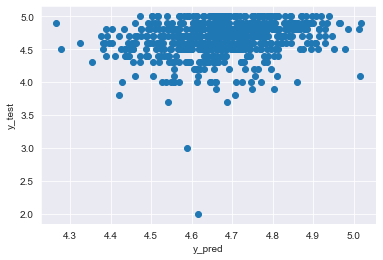

In [67]:
X=df_copy.drop(['rating'],axis=1)
y=df_copy['rating'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

y_pred = regressor.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(results_df)

plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()


In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 0.18726021263322162
Mean Squared Error: 0.07106867650063403
Root Mean Squared Error: 0.26658708989865587
R2 Score: 0.00021489875417624038


0.18726021263322162
0.07106867650063403
0.00021489875417624038
